**Building a linear classifier using only TensorFlow.**

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(2000, 2)
[[-1.4222177   1.6176451 ]
 [ 1.7875047   4.020148  ]
 [ 1.3645267   3.7840085 ]
 ...
 [ 3.0586498  -0.26727524]
 [ 2.0404503  -1.7866161 ]
 [ 4.053429    1.0632782 ]]
(2000, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


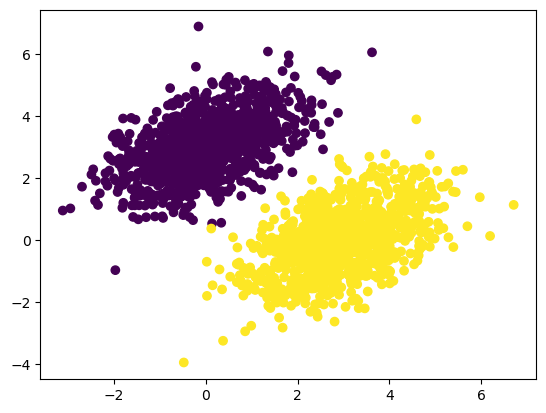

In [4]:
number_of_samples = 1000
sample_one = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=number_of_samples
)
sample_two = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=number_of_samples
)

# Stacking inputs into a single array
inputs = np.vstack((sample_one,sample_two)).astype(np.float32)
print(inputs.shape)
print(inputs)

# Stacking targets into a single array
targets = np.vstack((np.zeros((number_of_samples,1),dtype='float32'),
                     np.ones((number_of_samples,1),dtype='float32')))
print(targets.shape)
print(targets)

# Plotting the data
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])

**Now its time to create a linear classifier to seperate the targets. To do so (prediction = W • input + b) is trained. To do so W is initialized with random values and b is initialized with zeros respectively.**

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
input_dim = 2
output_dim = 1 
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Forward pass function
def model(x):
    return tf.matmul(x,W) + b

In [6]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) 
    return tf.reduce_mean(per_sample_losses)

In [7]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape: 
        predictions = model(inputs) 
        loss = square_loss(predictions, targets) 
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
    W.assign_sub(grad_loss_wrt_W * learning_rate) 
    b.assign_sub(grad_loss_wrt_b * learning_rate) 
    return loss

In [8]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.1029
Loss at step 1: 0.1599
Loss at step 2: 0.1031
Loss at step 3: 0.0898
Loss at step 4: 0.0832
Loss at step 5: 0.0780
Loss at step 6: 0.0734
Loss at step 7: 0.0693
Loss at step 8: 0.0655
Loss at step 9: 0.0620
Loss at step 10: 0.0588
Loss at step 11: 0.0559
Loss at step 12: 0.0533
Loss at step 13: 0.0509
Loss at step 14: 0.0487
Loss at step 15: 0.0467
Loss at step 16: 0.0448
Loss at step 17: 0.0432
Loss at step 18: 0.0416
Loss at step 19: 0.0402
Loss at step 20: 0.0390
Loss at step 21: 0.0378
Loss at step 22: 0.0368
Loss at step 23: 0.0358
Loss at step 24: 0.0349
Loss at step 25: 0.0341
Loss at step 26: 0.0334
Loss at step 27: 0.0327
Loss at step 28: 0.0321
Loss at step 29: 0.0315
Loss at step 30: 0.0310
Loss at step 31: 0.0305
Loss at step 32: 0.0301
Loss at step 33: 0.0297
Loss at step 34: 0.0294
Loss at step 35: 0.0290
Loss at step 36: 0.0288
Loss at step 37: 0.0285
Loss at step 38: 0.0282
Loss at step 39: 0.0280


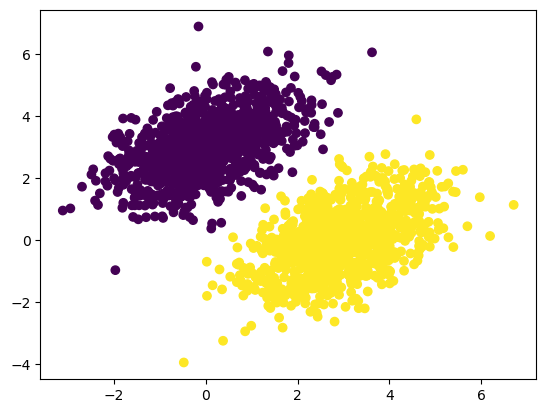

In [9]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

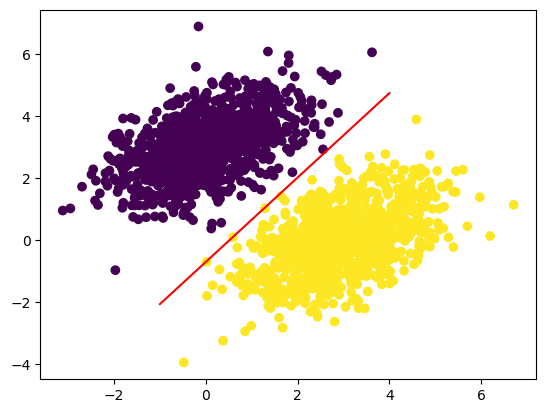

In [10]:
x = np.linspace(-1, 4, 100) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r") 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)